## Import

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

## Fits Header

In [2]:
fits_dir = "/data/tnorecon/RECON_clean/yuma/20201222"
fits.getheader(fits_dir + "/20201222_02/00001.fits")

SIMPLE  =                    T / Written by IDL:  Fri Jan 22 13:26:05 2021      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  640 /                                                
NAXIS2  =                  480 /                                                
DATE    = '2021-01-22'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
EXPTIME =             0.533867 /Exposure time in seconds                        
DATE-OBS= '2020-12-22T04:53:02.148' /Start of exposure UTC                      

## Star field

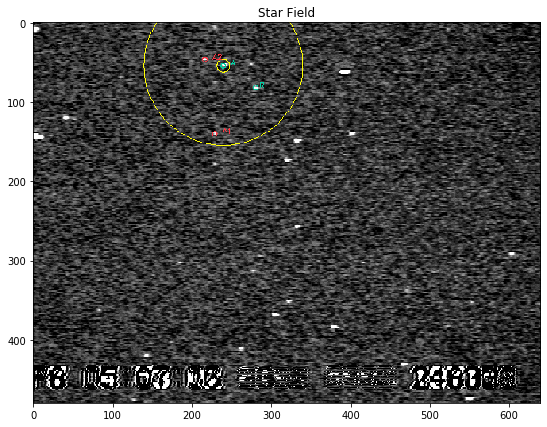

In [16]:
plt.figure(figsize=(10,7))
plt.imshow(plt.imread(fits_dir + "/wilson_fits_lc/20201222_02.png"))
#plt.ylim(100,0)
#plt.xlim(150,360)
plt.title("Star Field");

## Reading final data - no fitlcrel

In [4]:
final_data = np.loadtxt(fits_dir + '/wilson_fits_lc/20201222_02.final.dat', skiprows=2)
reference, time, flux, error = final_data.T

# Change time to match plot from IDL ("Time minutes from 4h UT")
time = time/60 - 4*60     # seconds to minutes and subtract 4 hours (in minutes)

## Signal to noise

In [5]:
sn = flux/error
average_sn = np.mean(sn)
print(average_sn)

3.6907225776022914


## Plot final flux - no fitlcrel

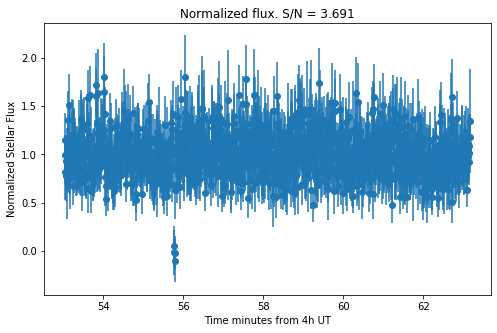

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(time, flux)
plt.errorbar(time, flux, error, fmt='none')
plt.title("Normalized flux. S/N = {:.3f}".format(average_sn))
plt.xlabel("Time minutes from 4h UT")
plt.ylabel("Normalized Stellar Flux")
plt.savefig("normflux_20201222_yuma.png")
plt.show()

## Zooming in to the possible event

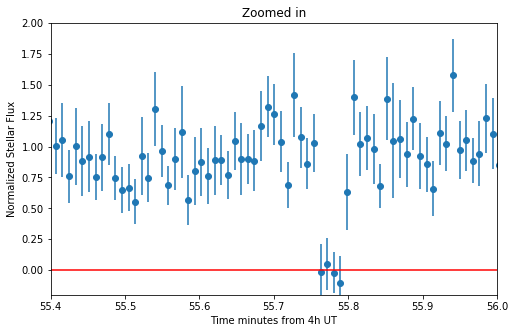

In [9]:
plt.figure(figsize=(8,5))
plt.axhline(0, c='red')
plt.scatter(time, flux)
plt.errorbar(time, flux, error, fmt='none')
plt.title("Zoomed in")
plt.xlabel("Time minutes from 4h UT")
plt.ylabel("Normalized Stellar Flux")
plt.xlim(55.4,56)
plt.ylim(-0.2,2)
plt.savefig("normflux_20201222_yuma_zoom.png")
plt.show()